In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def build_model(n_hidden, n_neurons_hidden, n_neurons_output, learning_rate):
    # --> add your Python code here
    # Creating the Neural Network using the Sequential API
    model = keras.models.Sequential()

    model.add(keras.layers.Flatten(input_shape=[28, 28]))  # input layer

    # iterate over the number of hidden layers to create the hidden layers:
    for _ in range(n_hidden):
        # hidden layer with ReLU activation function
        model.add(keras.layers.Dense(n_neurons_hidden, activation="relu"))

    """
    output layer with one neural for each class 
    and use the softmax activation function since the classes are exclusive
    """
    model.add(keras.layers.Dense(n_neurons_output, activation="softmax"))

    # defining the learning rate
    opt = keras.optimizers.SGD(learning_rate)

    # Compiling the Model specifying the loss function and the optimizer to use.
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    return model

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# creating a validation set and scaling the features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [4]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",
]

In [5]:
n_hidden = [2, 5, 10]
n_neurons = [10, 50, 100]
l_rate = [0.01, 0.05, 0.1]

In [6]:
def get_model_acc(model, X_test, y_test):
    correct_pred_count = 0
    class_predictions = np.argmax(model.predict(X_test), axis=-1)
    for pred, gt in zip(class_predictions, y_test):
        if pred == gt:
            correct_pred_count += 1

    return correct_pred_count / len(y_test)

In [7]:
n_hidden = [2, 5, 10]
n_neurons = [10, 50, 100]
l_rate = [0.01, 0.05, 0.1]

best_model = None
highest_accuracy = 0
best_param = {
    'h': None,
    'n': None,
    'lr': None,
}

# Training

In [11]:
for h in n_hidden:  # looking or the best parameters w.r.t the number of hidden layers
    for n in n_neurons:  # looking or the best parameters w.r.t the number of neurons
        for lr in l_rate:  # looking or the best parameters w.r.t the learning rate

            # build the model for each combination by calling the function:
            model = build_model(h, n, 10, lr)

            # To train the model
            """
            epochs: 
                number of times that the learning algorithm will 
                work through the entire training dataset.
            """
            history = model.fit(X_train, y_train,
                                epochs=5, validation_data=(X_valid, y_valid))

            # Calculate the accuracy of this neural network and store its value if it is the highest so far
            # -->add your Python code here
            model_acc = get_model_acc(model, X_test, y_test)
            # model_score = model.evaluate(X_test, y_test, verbose=True)  # return [v1 v2]

            if model_acc > highest_accuracy:
                highest_accuracy = model_acc
                best_param['h'] = h
                best_param['n'] = n
                best_param['lr'] = lr
                best_model = model

                msg = f"Highest accuracy so far: {highest_accuracy}"
                print(msg)

                msg = f"Parameters - Number of Hidden Layers: f{h}, Number of Neurons: {n}, Learning Rate: {lr}"
                print(msg)
                print()

Epoch 1/5
1719/1719 [==============================] - 2s 858us/step - loss: 1.1935 - accuracy: 0.5575 - val_loss: 0.7725 - val_accuracy: 0.7336
Epoch 2/5
1719/1719 [==============================] - 1s 812us/step - loss: 0.6672 - accuracy: 0.7639 - val_loss: 0.5797 - val_accuracy: 0.8010
Epoch 3/5
1719/1719 [==============================] - 1s 766us/step - loss: 0.5511 - accuracy: 0.8065 - val_loss: 0.5220 - val_accuracy: 0.8180
Epoch 4/5
1719/1719 [==============================] - 1s 764us/step - loss: 0.5044 - accuracy: 0.8228 - val_loss: 0.4778 - val_accuracy: 0.8402
Epoch 5/5
1719/1719 [==============================] - 1s 723us/step - loss: 0.4808 - accuracy: 0.8306 - val_loss: 0.4592 - val_accuracy: 0.8450
Highest accuracy so far: 0.8209
Parameters - Number of Hidden Layers: f2, Number of Neurons: 10, Learning Rate: 0.01

Epoch 1/5
1719/1719 [==============================] - 2s 862us/step - loss: 0.7312 - accuracy: 0.7397 - val_loss: 0.5339 - val_accuracy: 0.8094
Epoch 2/5
17

In [12]:
model = best_model
weights, biases = model.layers[1].get_weights()
print(weights)
print(biases)

[[-0.02494962 -0.07944223 -0.08094689 ...  0.05288916  0.06806845
   0.00160822]
 [ 0.00197722  0.0694062  -0.0204716  ... -0.07533789  0.0026388
  -0.05021861]
 [-0.01264124 -0.06572749  0.07165521 ... -0.05126089  0.07594621
  -0.03025454]
 ...
 [-0.07740438  0.07959449  0.07515996 ...  0.07466087 -0.02489778
  -0.05200844]
 [-0.05083654 -0.04730599 -0.07806312 ...  0.04059542  0.07279005
  -0.02938246]
 [-0.02306297  0.05365735  0.00751987 ...  0.05512934  0.00706814
  -0.06104314]]
[ 1.52069151e-01  1.79204181e-01  2.84834176e-01 -6.57084659e-02
  4.04687561e-02 -3.19165260e-01  6.64772242e-02  6.05190396e-01
  3.20044309e-01  2.08314285e-01 -4.75421129e-03  4.51953113e-02
 -1.52910175e-02 -1.89829871e-01  3.34037572e-01 -1.76421449e-01
 -5.50688989e-02  2.80500025e-01 -6.95276773e-03 -2.24930748e-01
  2.00952619e-01  1.80200651e-01 -3.92698310e-02 -1.86244488e-01
  2.03360930e-01  8.58517271e-03  3.33348781e-01 -2.16576487e-01
  2.87422180e-01 -1.16279805e-02  1.99026078e-01  1.15

In [16]:
print(model.summary())
img_file = './model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file,
                          show_shapes=True, show_layer_names=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


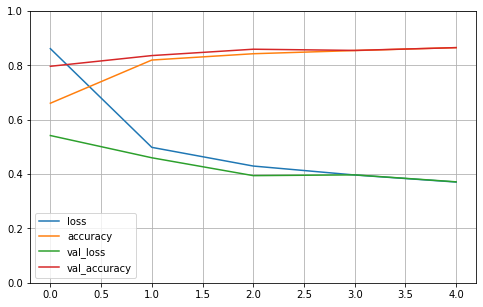

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()